In [1]:
import numpy as np
import scipy.stats as st
from scipy.special import gamma
import matplotlib.pyplot as plt

### Acceptance- rejection method

1. Generate samples with probability density f(x)
2. The acceptance-rejection (A-R) method can be used for multivariate problems as well.
3. Suppose we know how to generate samples from the distribution with pdf g(x), s.t.,
$f(x) \le cg(x), c > 1$
4. Follow the algorithm:

    4.1 Generate X from the distribution g(x);
    
    4.2 Generate U from Unif[0, 1];
    
    4.3 If $U \le f(X)/[cg(X)]$, return X; otherwise go to Step 1
    
5. Probability of acceptance on each attempt is 1/c. Want c close to 1

#### Example: Beta distribution

1. the Beta density is:
$f(x) = \frac{1}{B(\alpha, \beta)}x^{\alpha-1}(1-x)^{\beta-1},$ $0 \le x \le 1$

2. Assume $\alpha, \beta \geqslant 1$. Then $f(x)$ has a maximum at $(\alpha-1)/(\alpha+\beta-2).$
3. Define
$c = f((\alpha-1)/(\alpha+\beta-2))$ and choose $g(x) = 1$
4. The A-R method becomes:

    4.1 Generate independent $U_1$ and $U_2$ from $Unif[0, 1]$ until $cU_2 \leqslant f(U_1)$;
    
    4.2 Return $U_1$

<img src="Acceptance_Rejection.png" width="500">

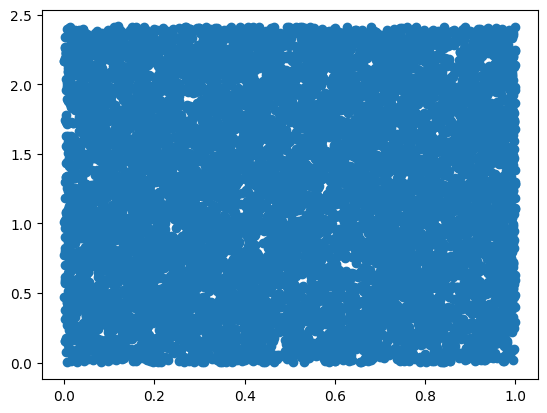

In [7]:
u1 = np.random.uniform(size=10000)
u2 = np.random.uniform(0, c, size=10000)

f_u1 = Beta_distribution(u1, alpha, beta)

# for i, j in zip(u1, u2):
plt.scatter(u1, u2)

plt.show()

In [8]:
(u2 < f_u1 / c)
ind = np.where(u2  <= f_u1 / c)

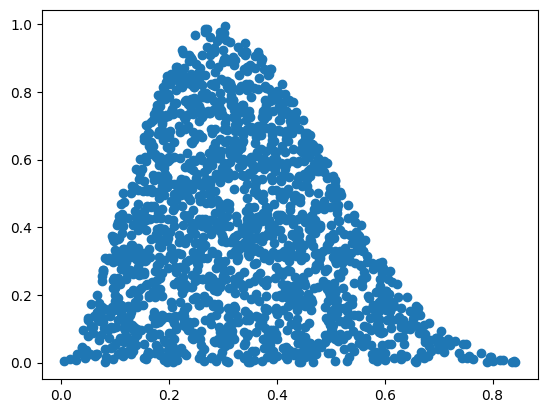

In [9]:
for i in ind:
    plt.scatter(u1[i], u2[i])
plt.show()

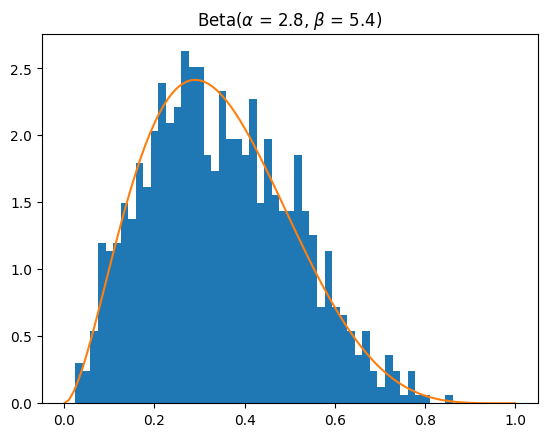

In [5]:
def Beta_distribution(x, a, b):
    
    beta = gamma(a) * gamma(b) /gamma(a + b)
    p = x ** (a - 1) * (1 - x) ** (b - 1)
    
    return 1 / beta * p



alpha = 2.8
beta = 5.4
extr = (alpha - 1) / (alpha + beta - 2)      # Extremum of Beta distribution
c = Beta_distribution(extr, alpha, beta)

def beta_gen(N, alpha, beta):
    i = 0
    arr = np.zeros(N)
    while i < N:
        u1 = np.random.uniform()
        u2 = np.random.uniform(0, c)
        if u2 < 1/c * Beta_distribution(u1, alpha, beta):
            arr[i] = u1
            i += 1
            
    return arr


px = np.arange(0,1+0.01,0.01)
py = Beta_distribution(px, alpha, beta)

Y = beta_gen(1000, alpha, beta)
fig , ax = plt.subplots()
temp = ax.hist(Y, bins=50, density=True)
ax.plot(px, py)
plt.title(r"Beta($\alpha$ = {}, $\beta$ = {})".format(alpha, beta))
plt.show()

In [6]:
dist = getattr(st, 'beta')
param = dist.fit(Y)

print("Parameters for Beta distribution are: alpha = {:}, beta = {}".format(param[0], param[1]))

beta_gen = Y
beta_test = np.random.beta(param[0], param[1], size=1000)
# beta_test = np.random.beta(alpha, beta, size=1000)
params = st.ttest_ind(beta_gen, beta_test)

print("P-value of found distribution is:", params[1])

Parameters for Beta distribution are: alpha = 2.3600122893875137, beta = 4.091101285946776
P-value of found distribution is: 0.0001292965640672512


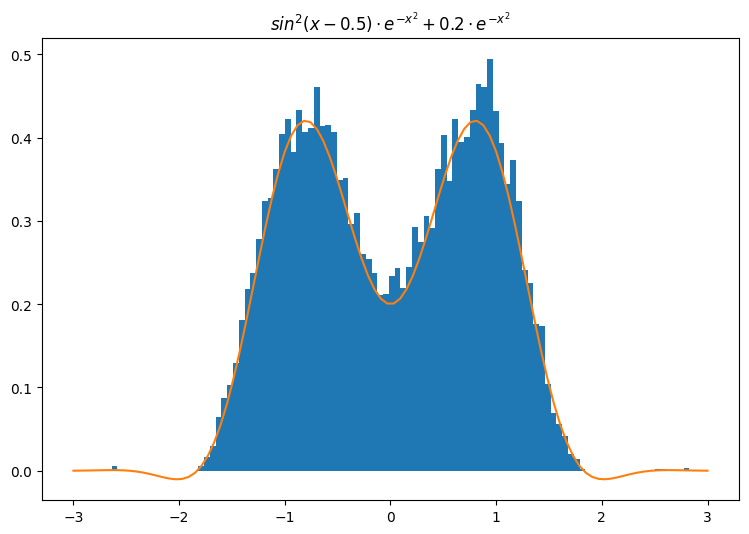

In [10]:
# def distr(x):
#     return np.sin(x-0.5)**2 * np.exp(-x**2) + 0.2*np.exp(-x**2)

def distr(x):
    return np.sin(x**2) * np.exp(-x**2) + 0.2*np.exp(-x**2)

def gen_distr(N, a=-3, b=3, c=0.8):
    arr = np.zeros(N)
    i = 0
    while i < N:
        u1 = np.random.uniform(a, b)
        u2 = np.random.uniform(0, c)
        if u2 < distr(u1) / c:
            arr[i] = u1
            i += 1
    return arr


values = np.linspace(-3,3,100)
y = distr(values)

gen_values = gen_distr(10000)

fig , ax = plt.subplots(figsize=(9, 6))
temp = ax.hist(gen_values, bins=100, density=True)
ax.plot(values, y)
plt.title(r"$sin^2(x-0.5)\cdot e^{-x^2} + 0.2 \cdot e^{-x^2}$")
plt.show()

# Questions?

In [11]:
### Monte Carlo simulations

In [12]:
from scipy.integrate import quad

def gx(x):
    return np.cos(x)

I = quad(gx, 0, np.pi / 2)
I

(0.9999999999999999, 1.1102230246251564e-14)

In [13]:
def MC_integral(gx, N, a=0, b=1):
    """with only uniform
        (b-a) * sum(g(x)) / N
        where x - are random varibles drawed from uniform distribution on (a, b)
    """

    u = np.random.uniform(a, b, N)
    gx = gx(u)
    return gx / N  

(MC_integral(gx, 10000) * (np.pi / 2)).sum()

1.3267652148062266

In [14]:
def f(x):
    return 3*x**2

(MC_integral(f, 10000)).sum()

1.009731934629825

In [15]:
x = np.random.uniform(-1, 1, 100)
y = np.random.uniform(-1, 1, 100)

mask = x**2 + y**2 <= 1

In [16]:
4 * mask.sum() / 100

3.36

In [17]:
def pi_value(n=1000):
    x = np.random.uniform(-1, 1, n)
    y = np.random.uniform(-1, 1, n)
    mask = x**2 + y**2 <= 1 
    return 4 * mask.sum() / n


N = 10000
values = np.zeros(N)
for i in range(N):
    values[i] = pi_value()
    
values.mean()

3.1415184000000003

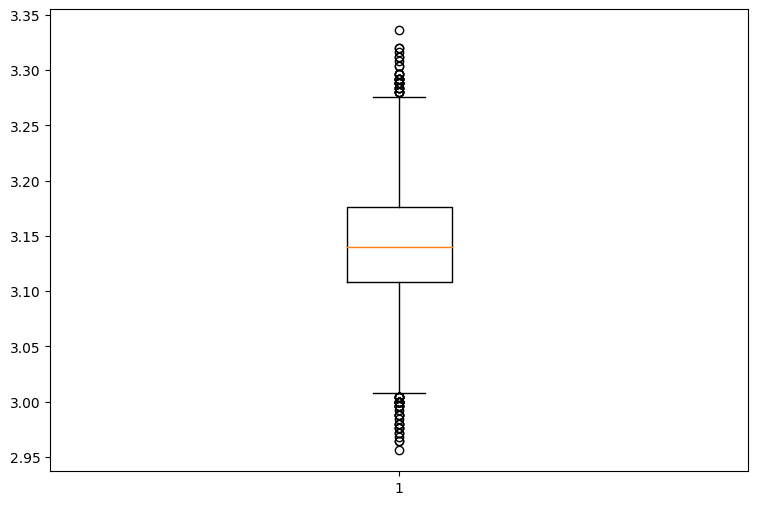

In [18]:
plt.figure(figsize=(9, 6))
plt.boxplot(values)
plt.show()

<img src="maxresdefault.jpg" width="500">

In [19]:
np.random.choice([-1, 1], 1)[0]

1

In [20]:
def peter(n=50):
    res = np.zeros(n)
    for i in range(n):
        u = np.random.uniform()
        if u < 0.5:
            res[i] = 1
        else:
            res[i] = -1
            
    return res

N = 10000
arr = np.zeros(N)
for i in range(N):
    arr[i] = peter().sum()
    

In [21]:
(arr == 0).sum() / N

0.109

### Brownian Motion

In [22]:
### The brownian motion timestep is n

n = 5000

In [23]:
###  two independent one-dimensional Brownian processes

x = np.cumsum(np.random.randn(n))
y = np.cumsum(np.random.randn(n))

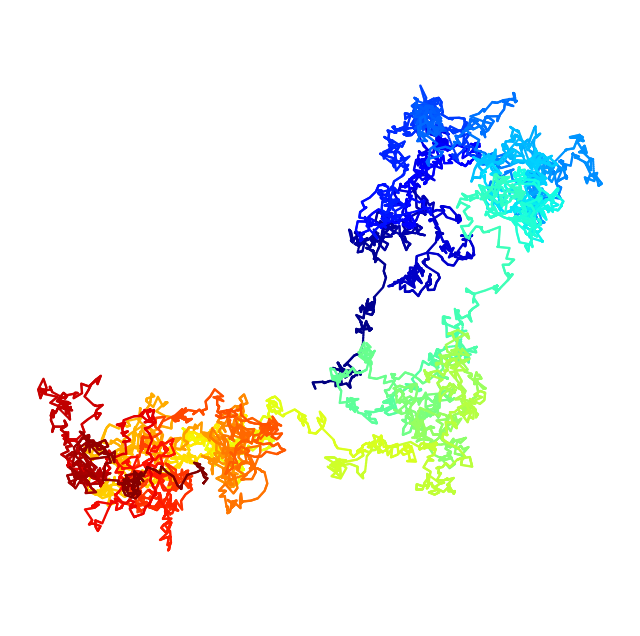

In [24]:
# We add 10 intermediary points between two
# successive points. We interpolate x and y.
k = 10
x2 = np.interp(np.arange(n * k), np.arange(n) * k, x)
y2 = np.interp(np.arange(n * k), np.arange(n) * k, y)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# Now, we draw our points with a gradient of colors.
ax.scatter(x2, y2, c=range(n * k), linewidths=0,
           marker='o', s=3, cmap=plt.cm.jet,)
ax.axis('equal')
ax.set_axis_off()

In [25]:
def gen_normal(n):
    w = np.zeros(n)
    for i in range(1, n):
        yi = np.random.normal()
        w[i] = w[i-1] + yi / np.sqrt(n)
    return w

def gen_random_walk(n):
    w = np.zeros(n)
    for i in range(1, n):
        yi = np.random.choice([1, -1])
        w[i] = w[i-1] + yi / np.sqrt(n)
        
    return w

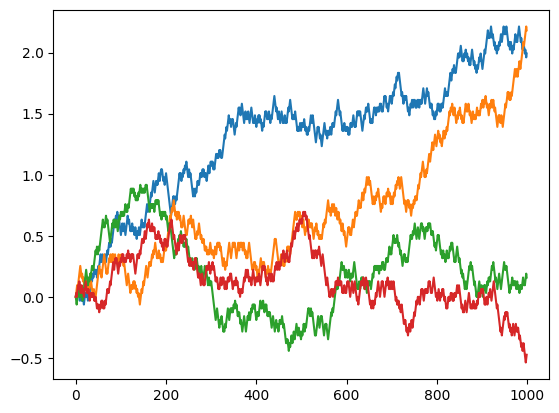

In [26]:
for i in range(4):
    plt.plot(gen_random_walk(1000))
plt.show()

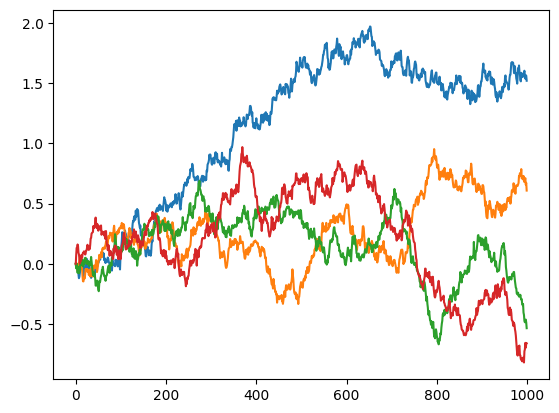

In [27]:
for i in range(4):
    plt.plot(gen_normal(1000))
plt.show()

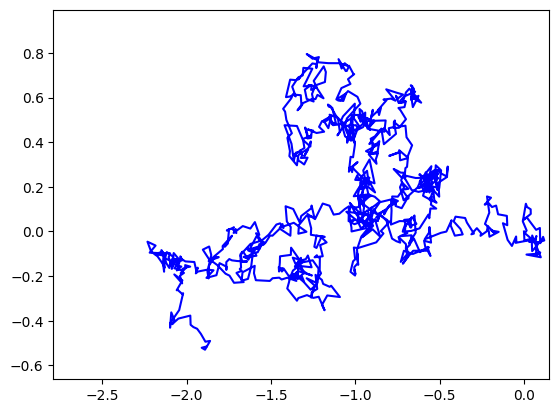

In [28]:
x = gen_normal(1000)
y = gen_normal(1000)

plt.plot(x, y, c='b')
xmax, xmin, ymax, ymin = x.max(), x.min(), y.max(), y.min()
scale_factor = 1.25
xmax, xmin, ymax, ymin = xmax * scale_factor, xmin * scale_factor, ymax * scale_factor, ymin * scale_factor
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()